# Pokemon com estatisticas 

Este conjunto de dados inclui 721 Pokémon, incluindo seu número, nome, primeiro e segundo tipo e estatísticas básicas: HP, Ataque, Defesa, Ataque Especial, Defesa Especial e Velocidade. Tem sido de grande utilidade no ensino de estatística para crianças. Com certos tipos, você também pode dar uma introdução geek ao aprendizado de máquina.

O dataset não possui uma variavel alvo bem definida para ser prevista, entao, foi decidido vamos tentar prever os pontos de defesa conforme os seus pontos de ataque, resultando em uma REGRESSÃO LINEAR SIMPLES

## The data as described by Myles O'Neill is:

- #: ID for each pokemon

- Name: Name of each pokemon

- Type 1: Each pokemon has a type, this determines weakness/resistance to attacks

- Type 2: Some pokemon are dual type and have 2

- Total: sum of all stats that come after this, a general guide to how strong a pokemon is

- HP: hit points, or health, defines how much damage a pokemon can withstand before fainting

- Attack: the base modifier for normal attacks (eg. Scratch, Punch)

- Defense: the base damage resistance against normal attacks

- SP Atk: special attack, the base modifier for special attacks (e.g. fire blast, bubble beam)

- SP Def: the base damage resistance against special attacks

- Speed: determines which pokemon attacks first each round

## Por que esse dataset? 

Simples, porque eu sou apaixonado pela franquia pokemon, joguei alguns jogos e assisti muito as temporadas classicas quando passava na redeTV, achei esse dataset por acaso entao vi uma otima oportunidade para analisa-lo

### Leitura de dados com pandas

In [1]:
import pandas as pd
import numpy as np

In [2]:
# Lendo o arquivo
df = pd.read_csv('Pokemon.csv', index_col = [0])

In [3]:
# Ver as tres primeiras linhas 
df.head(3)

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
#,,,,,,,,,,,,
1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False


In [4]:
# Verificando valores nulos nas colunas 
df.isna().sum()

Name            0
Type 1          0
Type 2        386
Total           0
HP              0
Attack          0
Defense         0
Sp. Atk         0
Sp. Def         0
Speed           0
Generation      0
Legendary       0
dtype: int64

In [5]:
# Verificando a porcentagem de valores nulos da coluna 'TYPE 2'
df.apply(lambda x: sum(x.isnull()/len(df)))

Name          0.0000
Type 1        0.0000
Type 2        0.4825
Total         0.0000
HP            0.0000
Attack        0.0000
Defense       0.0000
Sp. Atk       0.0000
Sp. Def       0.0000
Speed         0.0000
Generation    0.0000
Legendary     0.0000
dtype: float64

Quase 50% dos dados da coluna Type 2 são nulos, então é uma coluna descartavel

In [6]:
# Verificando os tipos de dados
df.dtypes

Name          object
Type 1        object
Type 2        object
Total          int64
HP             int64
Attack         int64
Defense        int64
Sp. Atk        int64
Sp. Def        int64
Speed          int64
Generation     int64
Legendary       bool
dtype: object

A coluna que informa a geração dos pokemons foi identificada como do tipo inteiro, mas como nao faremos operações matemáticas com ela, não faz sentido deixa-la como do tipo int

In [7]:
df.Generation = df['Generation'].astype(str)

In [8]:
# Verificando os tipos de dados novamente
df.dtypes

Name          object
Type 1        object
Type 2        object
Total          int64
HP             int64
Attack         int64
Defense        int64
Sp. Atk        int64
Sp. Def        int64
Speed          int64
Generation    object
Legendary       bool
dtype: object

In [9]:
# Preenchendo valores nulos com 0
df['Type 2'].fillna('Not Available', inplace = True)

In [10]:
# Verificando novamente se ha valores nulo 
df.isna().sum()

Name          0
Type 1        0
Type 2        0
Total         0
HP            0
Attack        0
Defense       0
Sp. Atk       0
Sp. Def       0
Speed         0
Generation    0
Legendary     0
dtype: int64

In [11]:
# Vendo quantos valores unicos ha em cada coluna 
print(df.nunique())

Name          800
Type 1         18
Type 2         19
Total         200
HP             94
Attack        111
Defense       103
Sp. Atk       105
Sp. Def        92
Speed         108
Generation      6
Legendary       2
dtype: int64


### Descritivo e exploração de dados com pandas (groupbys)

In [12]:
# Observando as médias estatisticas de cada tipo principal de pokemon
df.groupby('Type 1').mean()

,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Legendary
Type 1,,,,,,,,
Bug,378.927536,56.884058,70.971014,70.724638,53.869565,64.797101,61.681159,0.000000
Dark,445.741935,66.806452,88.387097,70.225806,74.645161,69.516129,76.161290,0.064516
Dragon,550.531250,83.312500,112.125000,86.375000,96.843750,88.843750,83.031250,0.375000
Electric,443.409091,59.795455,69.090909,66.295455,90.022727,73.704545,84.500000,0.090909
Fairy,413.176471,74.117647,61.529412,65.705882,78.529412,84.705882,48.588235,0.058824
Fighting,416.444444,69.851852,96.777778,65.925926,53.111111,64.703704,66.074074,0.000000
Fire,458.076923,69.903846,84.769231,67.769231,88.980769,72.211538,74.442308,0.096154
Flying,485.000000,70.750000,78.750000,66.250000,94.250000,72.500000,102.500000,0.500000
Ghost,439.562500,64.437500,73.781250,81.187500,79.343750,76.468750,64.343750,0.062500


In [13]:
# Comparando as estatisticas média dos pokemons lendarios com os não-lendarios 
df.groupby('Legendary').mean()

,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
Legendary,,,,,,,
False,417.213605,67.182313,75.669388,71.559184,68.454422,68.892517,65.455782
True,637.384615,92.738462,116.676923,99.661538,122.184615,105.938462,100.184615


In [14]:
# Vamos ver qual geração tem as melhores estatisticas 
df.groupby('Generation').mean()

,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Legendary
Generation,,,,,,,,
1,426.813253,65.819277,76.638554,70.861446,71.819277,69.090361,72.584337,0.036145
2,418.283019,71.207547,72.028302,73.386792,65.943396,73.905660,61.811321,0.047170
3,436.225000,66.543750,81.625000,74.100000,75.806250,71.225000,66.925000,0.112500
4,459.016529,73.082645,82.867769,78.132231,76.404959,77.190083,71.338843,0.107438
5,434.987879,71.787879,82.066667,72.327273,71.987879,68.739394,68.078788,0.090909
6,436.378049,68.268293,75.804878,76.682927,74.292683,74.890244,66.439024,0.097561


 Olhar numeros e ficar comparando é uma coisa chata, entao vamos colocar isso em formato gráfico

### Análise Exploratória e Figuras que mostrem insights sobre os dados com pandas, seaborn e matplotlib

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline
sns.set_palette('pastel')

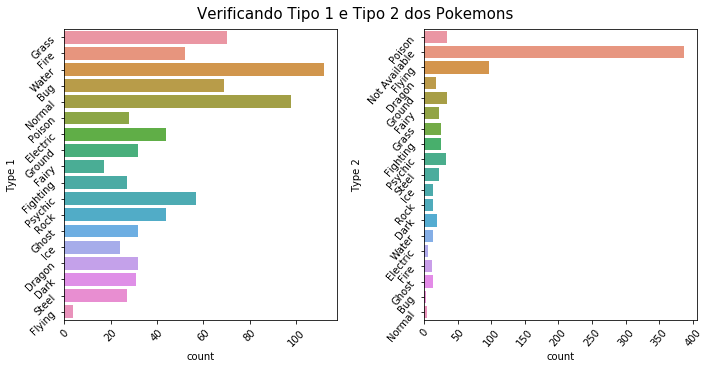

In [16]:
fig, ax = plt.subplots(1, 2, figsize = (10,5))
fig.suptitle('Verificando Tipo 1 e Tipo 2 dos Pokemons', y = 1.02, fontsize = 15)

ax[0].tick_params(labelrotation = 45)
sns.countplot(y = df['Type 1'], 
             ax = ax[0])

ax[1].tick_params(labelrotation = 50)
sns.countplot(y = df['Type 2'],
             ax = ax[1])

fig.tight_layout(pad = 1.2)

Os tipos de pokemons mais registrados nesse dataset são do tipo agua e tipo normal, e a sua minoria é do tipo voador e fada

A imensa maioria dos pokemons nao tem um segundo tipo, mas uma boa quando tem um tipo segundario é do tipo voador ou psiquico

C:\Users\pablo\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\pablo\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


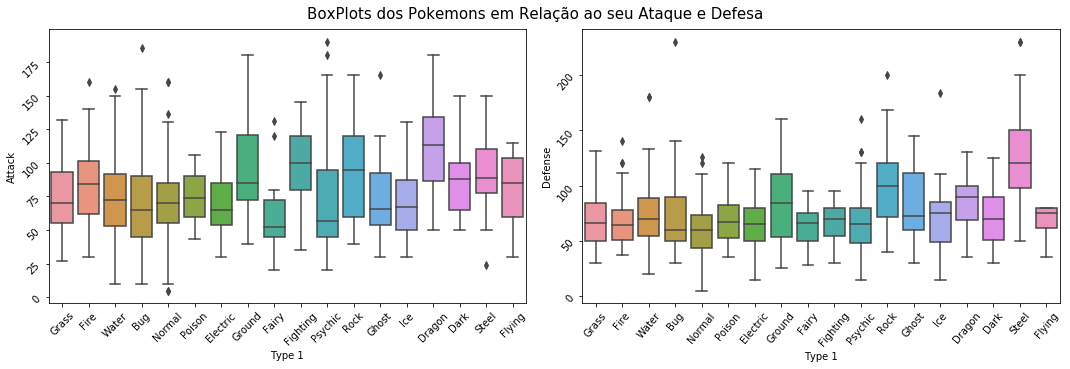

In [17]:
fig, ax = plt.subplots(1, 2, figsize = (15,5))
fig.suptitle('BoxPlots dos Pokemons em Relação ao seu Ataque e Defesa', y = 1.02, fontsize = 15)

ax[0].tick_params(labelrotation = 45)
sns.boxplot(df['Type 1'], df.Attack, 
             ax = ax[0])

ax[1].tick_params(labelrotation = 50)
sns.boxplot(df['Type 1'], df.Defense,
             ax = ax[1])

fig.tight_layout(pad = 1.2)

Os Boxplots nos mostram as estatisticas de cada tipo principal de pokemons, em relação ao seu ataque e sua defesa

- Em relação ao ataque, vemos que o tipo dragão é quem possui a maior mediana e que a coluna ataque possui 12 valores extremos 
- Sobre a defesa, é observado que o tipo aço possui a maior mediana e também há 11 valores extremos

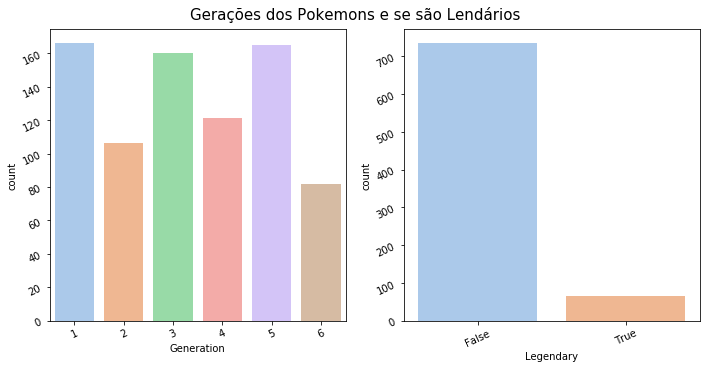

In [18]:
fig, ax = plt.subplots(1, 2, figsize = (10,5))
fig.suptitle('Gerações dos Pokemons e se são Lendários', y = 1.02, fontsize = 15)

ax[0].tick_params(labelrotation = 25)
sns.countplot(x = df['Generation'], 
             ax = ax[0])

ax[1].tick_params(labelrotation = 25)
sns.countplot(x = df['Legendary'],
             ax = ax[1])

fig.tight_layout(pad = 1.2)

As gerações 1, 3, 5 são as que mais contem pokemons nesse conjunto de dados

E para a surpresa de 0 pessoas, a minoria dos pokemons sao lendarios 

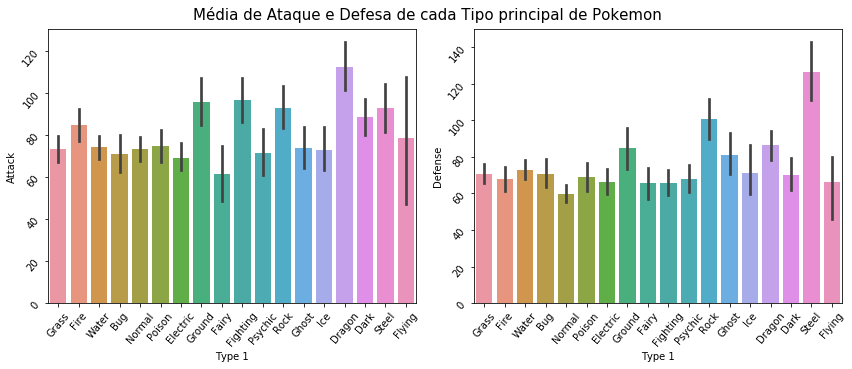

In [19]:
fig, ax = plt.subplots(1,2, figsize = (12,5))
plt.suptitle('Média de Ataque e Defesa de cada Tipo principal de Pokemon', y = 1.02, fontsize = 15)

ax[0].tick_params(labelrotation = 50)
sns.barplot(x = 'Type 1', y = 'Attack',
             data= df, ax = ax[0])


ax[1].tick_params(labelrotation = 50)
sns.barplot(x = 'Type 1', y = 'Defense',
             data= df, ax = ax[1])

fig.tight_layout(pad = 1.2)

Em relação ao ataque, foi observados que pokemons do tipo DRAGÃO tem a maior média em relação ao seu atributo ofensivo e do outro lado, as FADAS em média sao as mais fracas ofensivamente 

Em relação a defesa, os pokemons to tipo AÇO lideram essa estatistica com uma certa folga, em seguida aparecem os pokemons do tipo ROCHA/PEDRA e os pokemons do tipo NORMAL são os mais fracos 

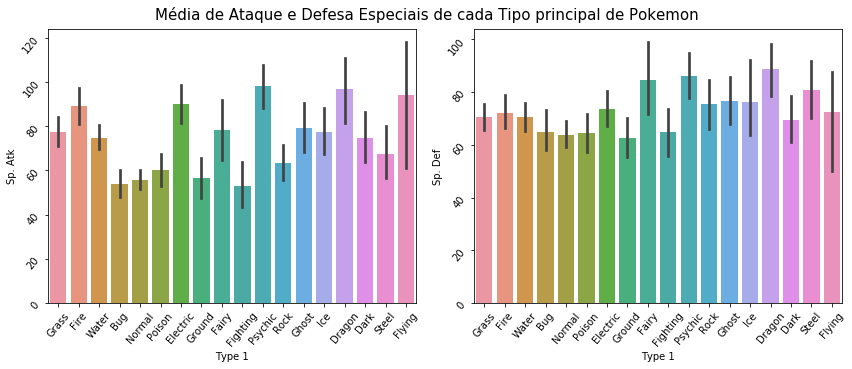

In [20]:
fig, ax = plt.subplots(1,2, figsize = (12,5))
plt.suptitle('Média de Ataque e Defesa Especiais de cada Tipo principal de Pokemon', y = 1.02, fontsize = 15)

ax[0].tick_params(labelrotation = 50)
sns.barplot(x = 'Type 1', y = 'Sp. Atk',
             data= df, ax = ax[0])


ax[1].tick_params(labelrotation = 50)
sns.barplot(x = 'Type 1', y = 'Sp. Def',
             data= df, ax = ax[1])

fig.tight_layout(pad = 1.2)

Os tipos voador, dragão e psiquico sao os que possuem maior média de pontos de ataques especiais 

Em relaçao a defesa especial, os dragões estao nas cabeças novamente, mas nao muito distante estao os psiquicos e fadas

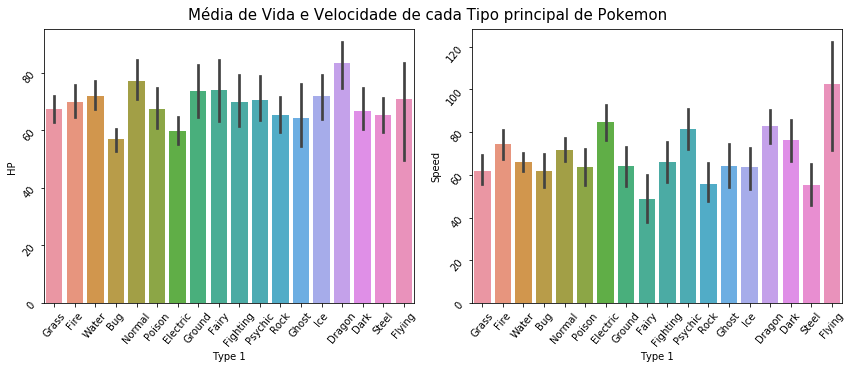

In [21]:
fig, ax = plt.subplots(1,2, figsize = (12,5))
plt.suptitle('Média de Vida e Velocidade de cada Tipo principal de Pokemon', y = 1.02, fontsize = 15)

ax[0].tick_params(labelrotation = 50)
sns.barplot(x = 'Type 1', y = 'HP',
             data= df, ax = ax[0])


ax[1].tick_params(labelrotation = 50)
sns.barplot(x = 'Type 1', y = 'Speed',
             data= df, ax = ax[1])

fig.tight_layout(pad = 1.2)

E pra nao perder o costume, o tipo dragao novamente esta na liderança de alguma estatistica e dessa vez é nos pontos de vida e sao seguidos pelos tipos normais 

Em relaçao a velocidade, o tipo voador é quem lidera de forma disparada essa estatistica

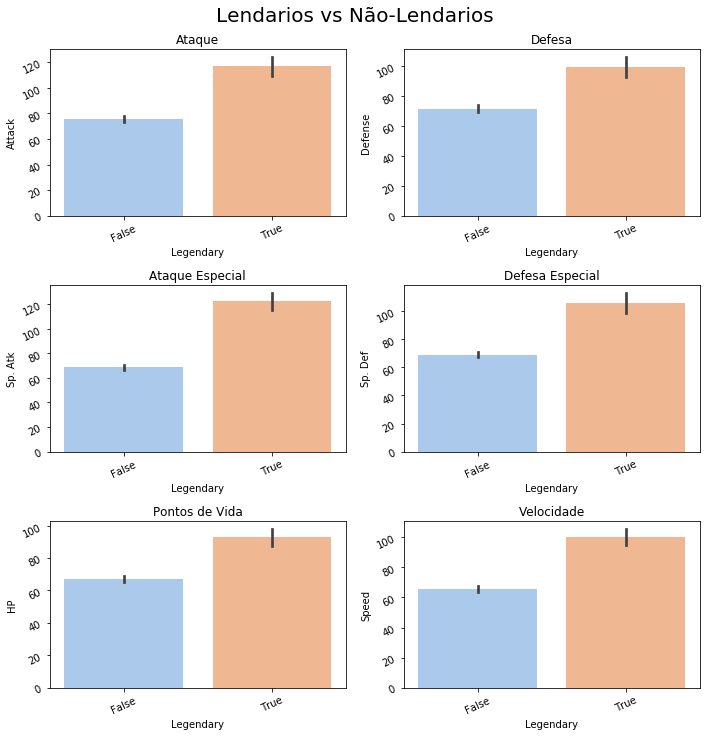

In [22]:
fig, ax = plt.subplots(3, 2, figsize = (10,10))
fig.suptitle('Lendarios vs Não-Lendarios', y = 1.02, fontsize = 20)

ax[0][0].tick_params(labelrotation = 25)
ax[0][0].set_title('Ataque')
sns.barplot(x = 'Legendary', y = 'Attack',
            data= df, ax = ax[0][0])

ax[0][1].tick_params(labelrotation = 25)
ax[0][1].set_title('Defesa')
sns.barplot(x = 'Legendary', y = 'Defense',
                data= df, ax = ax[0][1])

ax[1][0].tick_params(labelrotation = 25)
ax[1][0].set_title('Ataque Especial')
sns.barplot(x = 'Legendary', y = 'Sp. Atk',
                data= df, ax = ax[1][0])

ax[1][1].tick_params(labelrotation = 25)
ax[1][1].set_title('Defesa Especial')
sns.barplot(x = 'Legendary', y = 'Sp. Def',
                data= df, ax = ax[1][1])

ax[2][0].tick_params(labelrotation = 25)
ax[2][0].set_title('Pontos de Vida')
sns.barplot(x = 'Legendary', y = 'HP',
                data= df, ax = ax[2][0])

ax[2][1].tick_params(labelrotation = 25)
ax[2][1].set_title('Velocidade')
sns.barplot(x = 'Legendary', y = 'Speed',
                data= df, ax = ax[2][1])

fig.tight_layout(pad = 1.2)

E sempre nenhum tipo de surpresa, os pokemons lendarios mostram porque sao os mais raros

Voce deve ta se perguntando: "Pablo, porque voce nao fez a mesma coisa quando o eixo X era o Tipo 1 dos pokemons?", e eu respondo, eu nao fiz tal ato pois em cada grafico tinha uma informação diferente a ser comentada, entao para cada dupla de graficos, foi extraido uma informaçao diferente. Agora em relaçao ao lendarios, quando fizemos o "groupby", por ter poucos numeros, deu pra ver claramente que eles liderariam todas as estatisticas

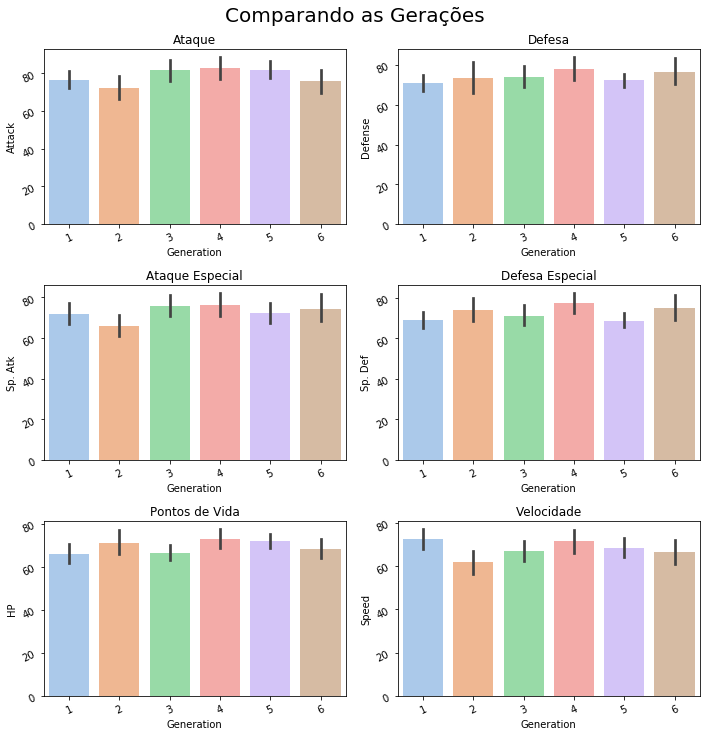

In [23]:
fig, ax = plt.subplots(3, 2, figsize = (10,10))
fig.suptitle('Comparando as Gerações', y = 1.02, fontsize = 20)

ax[0][0].tick_params(labelrotation = 25)
ax[0][0].set_title('Ataque')
sns.barplot(x = 'Generation', y = 'Attack',
            data= df, ax = ax[0][0])

ax[0][1].tick_params(labelrotation = 25)
ax[0][1].set_title('Defesa')
sns.barplot(x = 'Generation', y = 'Defense',
                data= df, ax = ax[0][1])

ax[1][0].tick_params(labelrotation = 25)
ax[1][0].set_title('Ataque Especial')
sns.barplot(x = 'Generation', y = 'Sp. Atk',
                data= df, ax = ax[1][0])

ax[1][1].tick_params(labelrotation = 25)
ax[1][1].set_title('Defesa Especial')
sns.barplot(x = 'Generation', y = 'Sp. Def',
                data= df, ax = ax[1][1])

ax[2][0].tick_params(labelrotation = 25)
ax[2][0].set_title('Pontos de Vida')
sns.barplot(x = 'Generation', y = 'HP',
                data= df, ax = ax[2][0])

ax[2][1].tick_params(labelrotation = 25)
ax[2][1].set_title('Velocidade')
sns.barplot(x = 'Generation', y = 'Speed',
                data= df, ax = ax[2][1])

fig.tight_layout(pad = 1.2)

Ha um bom equilibrio em todas as estatisticas entre as geraçoes, mas a geração 4 se mostra mais forte, pois lidera a média de HP, ataque, defesa, ataque e defesa especiais, so perdendo na velocidade

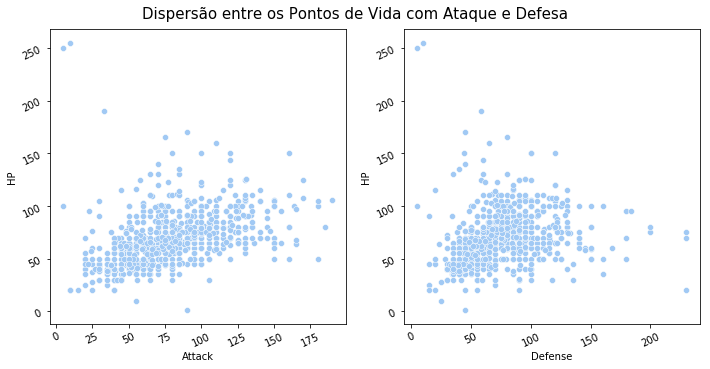

In [24]:
fig, ax = plt.subplots(1, 2, figsize = (10,5))
fig.suptitle('Dispersão entre os Pontos de Vida com Ataque e Defesa', y = 1.02, fontsize = 15)

ax[0].tick_params(labelrotation = 25)
sns.scatterplot(x = 'Attack', y = 'HP',
                data= df, ax = ax[0])

ax[1].tick_params(labelrotation = 25)
sns.scatterplot(x = 'Defense', y = 'HP',
                data= df, ax = ax[1])

fig.tight_layout(pad = 1.2)

Podemos ver nos dois graficos que conforme o ataque ou defesa aumenta, a vida tem uma tendência a aumentar tambem mas podemos observar que os pokemons com maiores pontos de defesa, tem uma quantidade relativamente baixa de vida

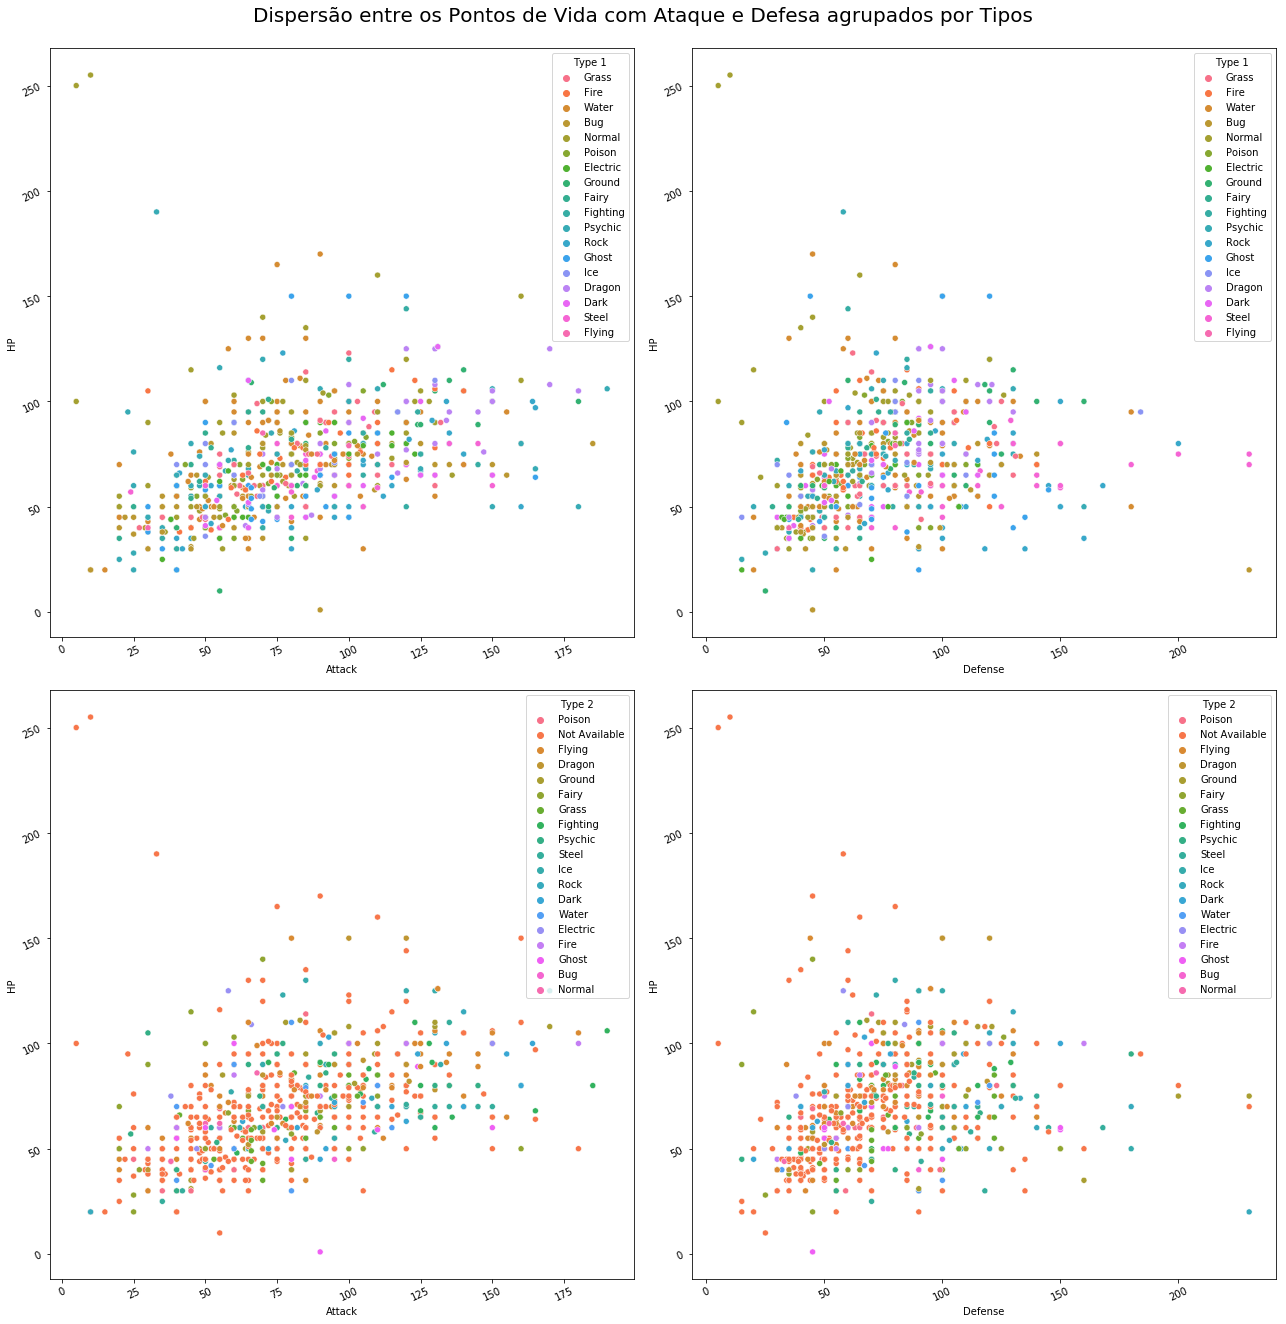

In [25]:
fig, ax = plt.subplots(2, 2, figsize = (18,18))
fig.suptitle('Dispersão entre os Pontos de Vida com Ataque e Defesa agrupados por Tipos', y = 1.02, fontsize = 20)

ax[0][0].tick_params(labelrotation = 25)
sns.scatterplot(x = 'Attack', y = 'HP',
                hue = 'Type 1',
                data= df, ax = ax[0][0])

ax[0][1].tick_params(labelrotation = 25)
sns.scatterplot(x = 'Defense', y = 'HP',
                hue = 'Type 1',
                data= df, ax = ax[0][1])

ax[1][0].tick_params(labelrotation = 25)
sns.scatterplot(x = 'Attack', y = 'HP',
                hue = 'Type 2',
                data= df, ax = ax[1][0])

ax[1][1].tick_params(labelrotation = 25)
sns.scatterplot(x = 'Defense', y = 'HP',
                hue = 'Type 2',
                data= df, ax = ax[1][1])

fig.tight_layout(pad = 1.2)

Podemos observar que independente do tipo (seja 1 ou 2) do pokemon, eles estão bem equilibrados mas vemos no grafico 1,1 que os pokemons com mais vida, tem baixissimos pontos de ataque e que sao do tipo normal

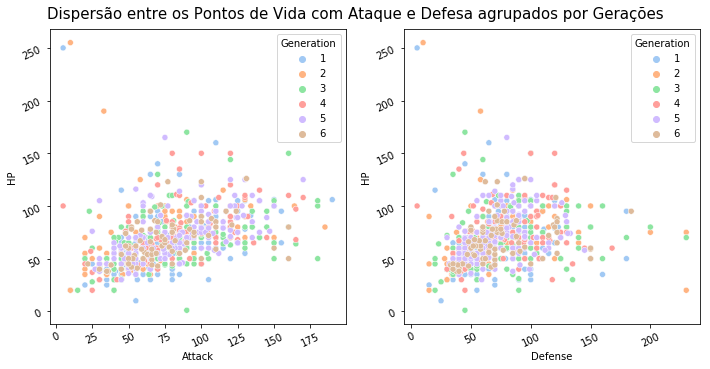

In [26]:
fig, ax = plt.subplots(1, 2, figsize = (10,5))
fig.suptitle('Dispersão entre os Pontos de Vida com Ataque e Defesa agrupados por Gerações', y = 1.02, fontsize = 15)

ax[0].tick_params(labelrotation = 25)
sns.scatterplot(x = 'Attack', y = 'HP',
                hue = 'Generation',
                data= df, ax = ax[0])

ax[1].tick_params(labelrotation = 25)
sns.scatterplot(x = 'Defense', y = 'HP',
                hue = 'Generation',
                data= df, ax = ax[1])

fig.tight_layout(pad = 1.2)

Pokemons de Geraçoes 1 a 3 tem maior probabilidade de passar os 100 pontos de vida e 150 de ataque, em relação a defesa, praticamente todos estão próximos da faixa 50-100 e os que passam dessa faixa em sua maioria sao pokemons de geração 1 a 3

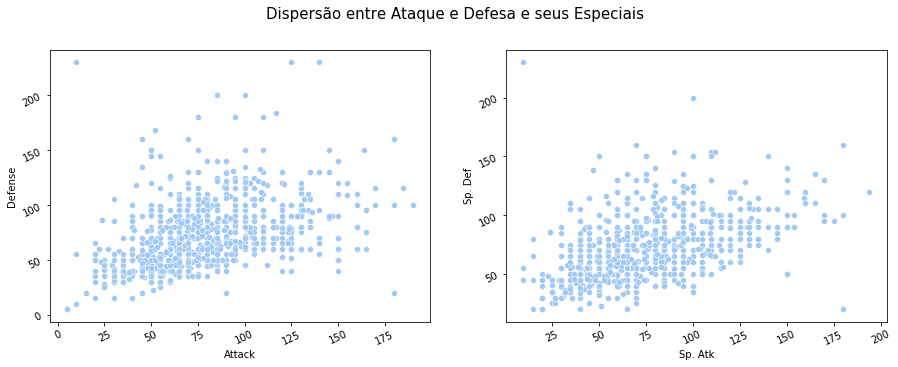

In [27]:
fig, ax = plt.subplots(1,2, figsize = (15,5))
fig.suptitle('Dispersão entre Ataque e Defesa e seus Especiais', y = 1, fontsize = 15)

ax[0].tick_params(labelrotation = 25)
sns.scatterplot(x = 'Attack', y = 'Defense', 
                data= df, ax = ax[0])

ax[1].tick_params(labelrotation = 25)
sns.scatterplot(x = 'Sp. Atk', y = 'Sp. Def',
                data= df, ax = ax[1])

Podemos observar que conforme os pontos de ataque (especiais ou não) sobem, os de defensa tendem a subir também

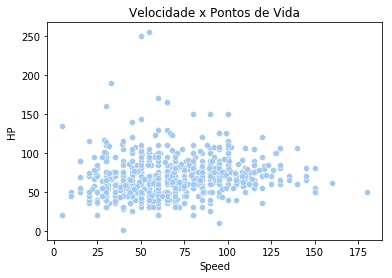

In [28]:
plt.title('Velocidade x Pontos de Vida')
sns.scatterplot(x = 'Speed', y = 'HP',
                data= df)

Vemos que nao é ha uma forte correlação de quanto maior a velocidade, maior a vida, vemos que os pokemons com maior quandidade de vida, tem velocidade mediana

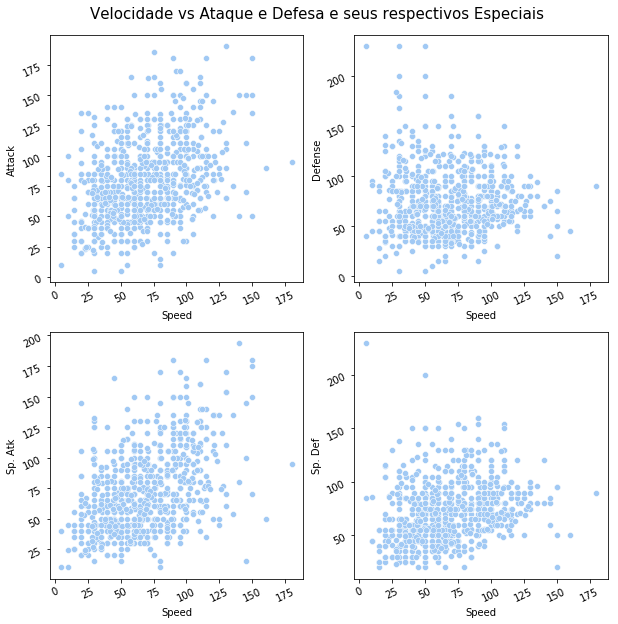

In [29]:
fig, ax = plt.subplots(2,2, figsize = (10,10))
fig.suptitle('Velocidade vs Ataque e Defesa e seus respectivos Especiais ',y = 0.92, fontsize = 15)

ax[0][0].tick_params(labelrotation = 25)
sns.scatterplot(x= 'Speed', y ='Attack',
                data = df, ax = ax[0][0])

ax[0][1].tick_params(labelrotation = 25)
sns.scatterplot(x= 'Speed', y ='Defense',
                data = df, ax = ax[0][1])

ax[1][0].tick_params(labelrotation = 25)
sns.scatterplot(x= 'Speed', y ='Sp. Atk',
                data = df, ax = ax[1][0])

ax[1][1].tick_params(labelrotation = 25)
sns.scatterplot(x= 'Speed', y ='Sp. Def',
                data = df, ax = ax[1][1])

Observamos que a velocidade esta bem correlacionada com o ataque, a medida que a velocidade da maioria dos pokemons aumenta, sua força de ataque tambem aumenta, nao podemos dizer com tanta firmeza em relação a defesa, conforme sua velocidade aumenta, seu poder de defesa aumenta um pouco

### Vamos remover os outliers

C:\Users\pablo\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\pablo\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


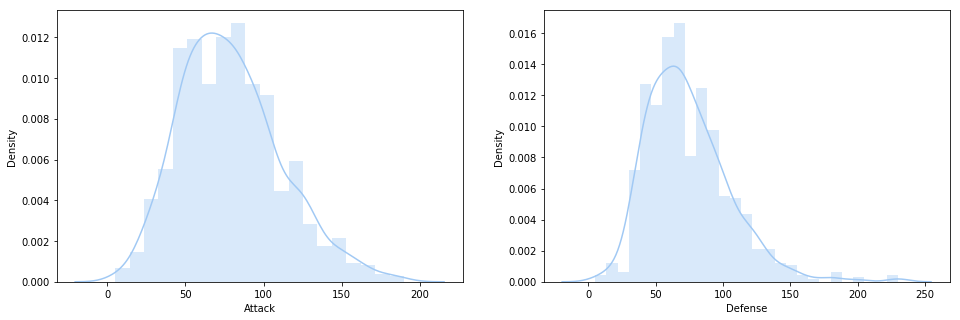

In [30]:
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.distplot(df['Attack'])
plt.subplot(1,2,2)
sns.distplot(df['Defense'])
plt.show()

In [31]:
# Removendo os outliers de ATAQUE
upper_limit_atk = df['Attack'].quantile(0.95)
lower_limit_atk = df['Attack'].quantile(0.01)

In [32]:
print(upper_limit_atk, lower_limit_atk)

136.19999999999982 20.0


In [33]:
new_df = df[(df['Attack'] <= upper_limit_atk) & (df['Attack'] >= lower_limit_atk)]

C:\Users\pablo\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\pablo\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


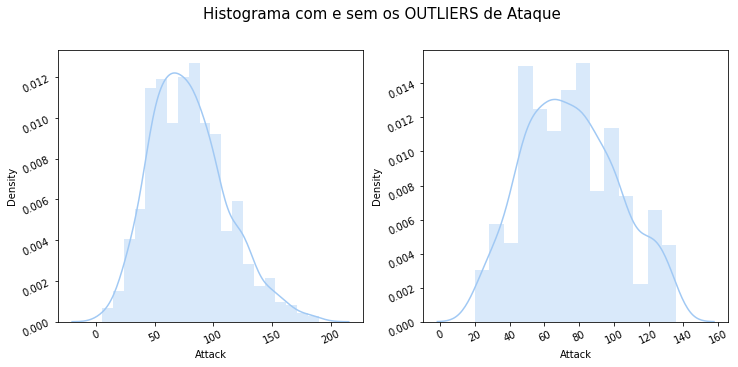

In [34]:
fig, ax = plt.subplots(1,2, figsize = (12,5))
fig.suptitle('Histograma com e sem os OUTLIERS de Ataque', y = 1, fontsize = 15)

ax[0].tick_params(labelrotation = 25)
sns.distplot(df['Attack'],ax = ax[0])

ax[1].tick_params(labelrotation = 25)
sns.distplot(new_df['Attack'],ax = ax[1])

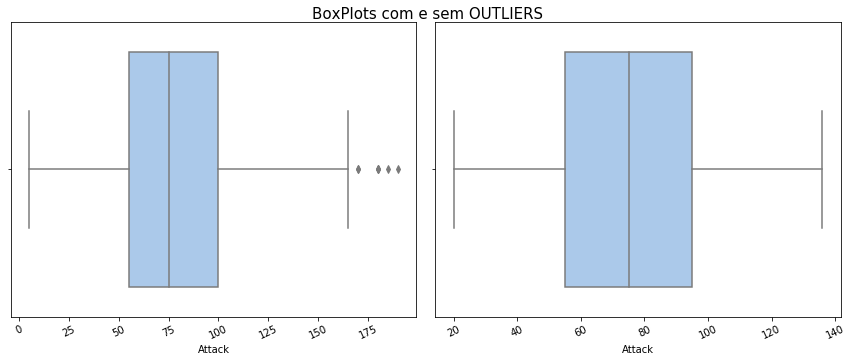

In [35]:
fig, ax = plt.subplots(1,2, figsize = (12,5))
fig.suptitle('BoxPlots com e sem OUTLIERS', y = 1, fontsize = 15)

ax[0].tick_params(labelrotation = 25)
sns.boxplot(x = 'Attack',data= df, ax = ax[0])

ax[1].tick_params(labelrotation = 25)
sns.boxplot(x = 'Attack',data= new_df, ax = ax[1])

fig.tight_layout(pad = 1.2)

In [36]:
# Removendo os outliers de DEFESA
upper_limit_def = df['Defense'].quantile(0.95)
lower_limit_def = df['Defense'].quantile(0.01)

In [37]:
print(upper_limit_def, lower_limit_def)

130.0 20.0


In [38]:
new_df = df[(df['Defense'] <= upper_limit_def) & (df['Defense'] >= lower_limit_def)]

C:\Users\pablo\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\pablo\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


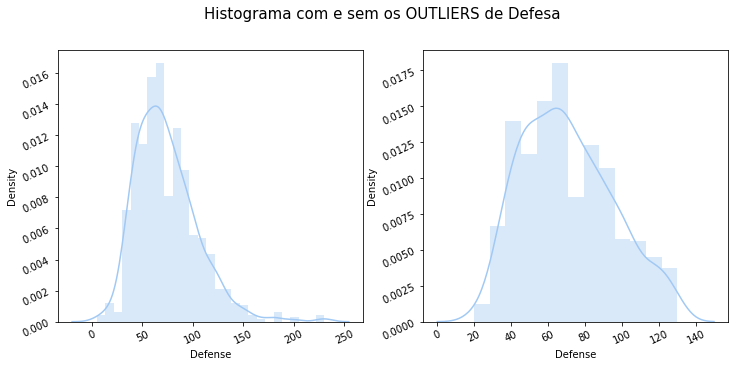

In [39]:
fig, ax = plt.subplots(1,2, figsize = (12,5))
fig.suptitle('Histograma com e sem os OUTLIERS de Defesa', y = 1, fontsize = 15)

ax[0].tick_params(labelrotation = 25)
sns.distplot(df['Defense'],ax = ax[0])

ax[1].tick_params(labelrotation = 25)
sns.distplot(new_df['Defense'],ax = ax[1])

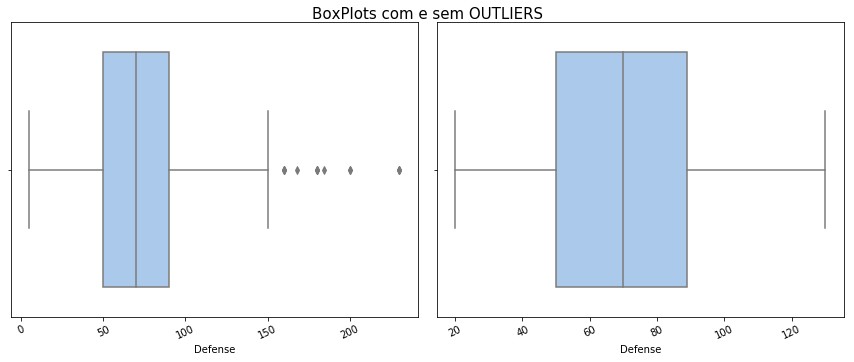

In [40]:
fig, ax = plt.subplots(1,2, figsize = (12,5))
fig.suptitle('BoxPlots com e sem OUTLIERS', y = 1, fontsize = 15)

ax[0].tick_params(labelrotation = 25)
sns.boxplot(x = 'Defense',data= df, ax = ax[0])

ax[1].tick_params(labelrotation = 25)
sns.boxplot(x = 'Defense',data= new_df, ax = ax[1])

fig.tight_layout(pad = 1.2)

In [41]:
# Calculando a media da nossa variavel target
MeanDefense = new_df.Defense.mean()
MeanDefense

70.72010512483574

In [42]:
# Calculando (simulando) o SSE
# O SSE é a diferença ao quadrado entre o valor previsto e o valor observado.
# Considerando que o valor previsto seja igual a média, podemos considerar que 
# y = média da variável target (valores observados).

# Estamos apenas simulando o SSE, uma vez que a regressão ainda não foi criada e os valores previstos 
# ainda não foram calculados.

squared_errors = pd.Series(MeanDefense - new_df['Defense'])**2 
SSE = np.sum(squared_errors)
print ('A Soma dos Quadrados dos Erros (SSE) é igual a %01.f' % SSE)

A Soma dos Quadrados dos Erros (SSE) é igual a 468833


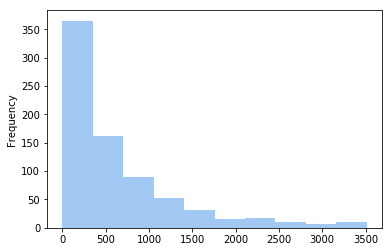

In [43]:
squared_errors.plot('hist')

Temos mais erros "pequenos", ou seja, mais valores próximos à média.

Para Regressão Linear Simples usaremos como variável explanatória a variável Attack que representa os pontos de ataque de cada pokemon

In [44]:
print('O Desvio Padrão do nosso alvo é: ', np.std(new_df['Defense']))

O Desvio Padrão do nosso alvo é:  24.820866300980093


In [45]:
# Vamos ver a correlação entre Defesa e Ataque usando o scipy
from scipy.stats.stats import pearsonr

In [46]:
print ('Correlação entre Defesa e Ataque é %0.5f' % pearsonr(new_df['Attack'], new_df['Defense'])[0])

Correlação entre Defesa e Ataque é 0.48189


In [47]:
# Definindo o range de valores de X e y
XRange = [new_df['Attack'].min(), new_df['Attack'].max()]
yRange = [new_df['Defense'].min(), new_df['Defense'].max()]

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


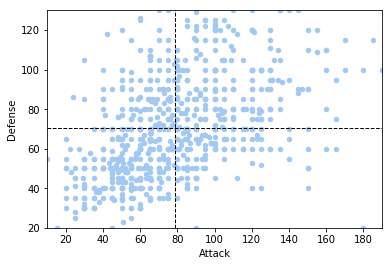

In [48]:
scatterPlot = new_df.plot(kind = 'scatter', x = 'Attack', y = 'Defense', xlim = XRange, ylim = yRange)

# Calculando a média
meanY = scatterPlot.plot(XRange, [new_df['Defense'].mean(),new_df['Defense'].mean()], '--', color = 'black', linewidth = 1)
meanX = scatterPlot.plot([new_df['Attack'].mean(), new_df['Attack'].mean()], yRange, '--', color = 'black', linewidth = 1)

### Quebrar os dados em conjunto de treino e conjunto de teste

In [49]:
from sklearn.model_selection import train_test_split

In [50]:
# Define os valores de x e y
num_observ = len(new_df)
X = new_df['Attack'].values.reshape((num_observ, 1)) # X deve sempre ser uma matriz e nunca um vetor
y = new_df['Defense'].values # y pode ser um vetor

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

In [52]:
X

array([[ 49],
       [ 62],
       [ 82],
       [100],
       [ 52],
       [ 64],
       [ 84],
       [130],
       [104],
       [ 48],
       [ 63],
       [ 83],
       [103],
       [ 30],
       [ 20],
       [ 45],
       [ 35],
       [ 25],
       [ 90],
       [150],
       [ 45],
       [ 60],
       [ 80],
       [ 80],
       [ 56],
       [ 81],
       [ 60],
       [ 90],
       [ 60],
       [ 85],
       [ 55],
       [ 90],
       [ 75],
       [100],
       [ 47],
       [ 62],
       [ 92],
       [ 57],
       [ 72],
       [102],
       [ 45],
       [ 70],
       [ 41],
       [ 76],
       [ 45],
       [ 70],
       [ 45],
       [ 80],
       [ 50],
       [ 65],
       [ 80],
       [ 70],
       [ 95],
       [ 55],
       [ 65],
       [ 55],
       [ 80],
       [ 45],
       [ 70],
       [ 52],
       [ 82],
       [ 80],
       [105],
       [ 70],
       [110],
       [ 50],
       [ 65],
       [ 95],
       [ 35],
       [ 50],
       [ 50],
      

In [53]:
y

array([ 49,  63,  83, 123,  43,  58,  78, 111,  78,  65,  80, 100, 120,
        35,  55,  50,  30,  50,  40,  40,  40,  55,  75,  80,  35,  60,
        30,  65,  44,  69,  40,  55,  85, 110,  52,  67,  87,  40,  57,
        77,  48,  73,  40,  75,  20,  45,  35,  70,  55,  70,  85,  55,
        80,  50,  60,  25,  50,  35,  60,  48,  78,  35,  60,  45,  80,
        40,  65,  95,  30,  45,  65,  50,  70,  80,  35,  50,  65,  35,
        65, 100, 115, 130,  55,  70,  65, 110,  70,  95,  55,  45,  70,
        55,  80,  50,  75, 100,  30,  45,  60,  80,  45,  70,  90, 115,
        50,  70,  80,  85,  95, 110,  53,  79,  75,  95, 120,  95, 120,
       115,  80, 100,  70,  95,  60,  65,  55,  85,  65,  80,  35,  57,
        57, 100, 120,  95,  55,  79, 109,  80,  48,  50,  60,  60,  60,
        70, 100, 125,  90, 105,  65,  85,  65, 100,  85,  90,  45,  65,
        95,  90, 100,  70, 100,  65,  80, 100,  43,  58,  78,  64,  80,
       100,  34,  64,  30,  50,  30,  50,  40,  70,  80,  38,  5

In [54]:
print('Tamanho de X_train: ', X_train.shape)
print('Tamanho de X_test: ', X_test.shape)
print('Tamanho de y_train: ', y_train.shape)
print('Tamanho de y_test: ', y_test.shape)

Tamanho de X_train:  (532, 1)
Tamanho de X_test:  (229, 1)
Tamanho de y_train:  (532,)
Tamanho de y_test:  (229,)


### Treinar um estimador do scikit-learn de aprendizagem supervisionada (regressor ou classificador) no conjunto de treino

In [55]:
from sklearn.linear_model import LinearRegression

In [56]:
modelo = LinearRegression()

In [57]:
modelo_treinado = modelo.fit(X_train, y_train)

### Verificar o desempenho do estimador do scikit-learn no conjunto de teste

In [58]:
# Imprimindo os coeficientes
print (modelo_treinado.coef_)
print (modelo_treinado.intercept_)

[0.39348859]
39.7037032403376


In [59]:
# Agora vamos imprimir as previsoes 
print(modelo_treinado.predict(X_test))

[ 67.24790489  67.24790489  71.96976803  61.34557596  86.92233463
  90.85722058  62.91953034 110.53165033  55.83673563  59.37813299
  71.18279084  82.98744868  57.41069001  79.05256274  90.85722058
  79.05256274  51.50836109  71.18279084  75.11767679  53.47580406
  72.75674522  58.5911558   47.57347514  65.28046191  63.31301894
  49.54091811  55.44324704  74.72418819  86.92233463  71.18279084
  49.54091811  59.37813299  96.75954951  53.47580406  65.28046191
  73.15023381  70.39581365  69.21534786  68.03488208  86.92233463
  67.24790489  82.98744868  65.28046191  51.50836109  79.83953993
  59.37813299  71.18279084  73.15023381  75.11767679  90.85722058
  49.54091811  67.24790489  94.79210653  70.00232505  79.05256274
  65.28046191  65.67395051  67.24790489  71.18279084  75.90465398
  65.28046191  68.03488208  65.28046191  58.5911558   60.16511018
  64.88697332  69.21534786  66.85441629  57.41069001  79.05256274
  74.3306996   88.49628901  68.03488208  68.03488208  71.57627943
  77.08511

In [60]:
# Agora vamos fazer uma previsao com valor diferente

Attack = 57
Xp = np.array(Attack).reshape(-1, 1)
print ("Quando os Pontos de Ataque são %01.f, nosso modelo prevê que a força de Defesa será %0.1f" % (Attack, modelo_treinado.predict(Xp)))

Quando os Pontos de Ataque são 57, nosso modelo prevê que a força de Defesa será 62.1
